In [51]:
from utils.loader import USAGE
from usage_process import average_utilization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
usage = USAGE

In [3]:
benefit_mean_usage = usage[['BenefitID', 'UsageFrequency']].groupby('BenefitID').mean('UsageFrequency')

<BarContainer object of 30 artists>

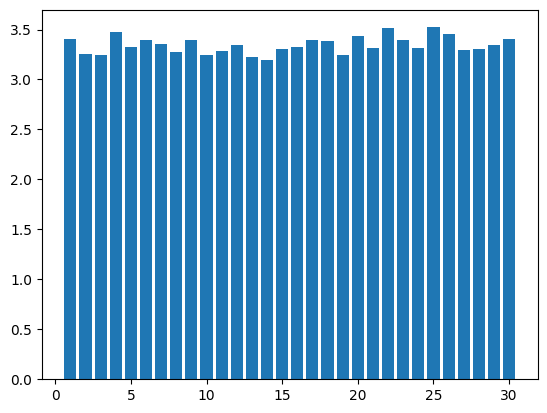

In [4]:
plt.bar(benefit_mean_usage.index, benefit_mean_usage['UsageFrequency'])

In [5]:
usage['LastUsedDate'] = pd.to_datetime(usage['LastUsedDate'])
usage['LastUsedMonth'] = usage['LastUsedDate'].dt.month

In [6]:
month_mean_usage = usage[['LastUsedMonth', 'UsageFrequency']].groupby('LastUsedMonth').mean('UsageFrequency')

<BarContainer object of 12 artists>

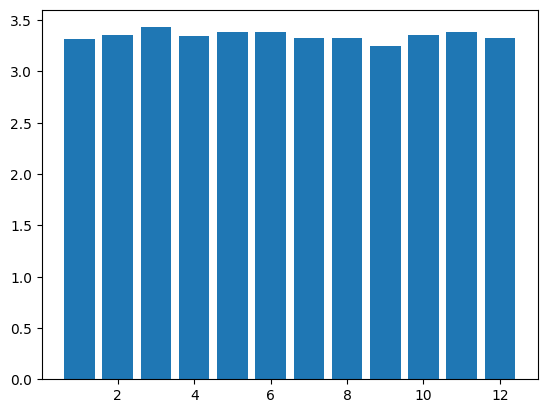

In [7]:
plt.bar(month_mean_usage.index, month_mean_usage['UsageFrequency'])

,UsageFrequency
BenefitID,
1,3.409416
2,3.257267
3,3.242781
4,3.476651
5,3.327830
6,3.393238
7,3.352212
8,3.280000
9,3.397490


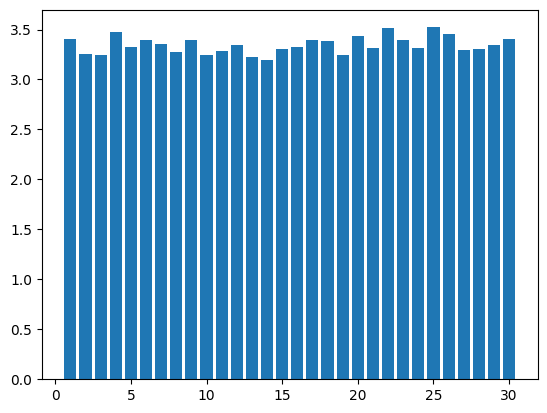

In [8]:
average_utilization('BenefitID', usage)

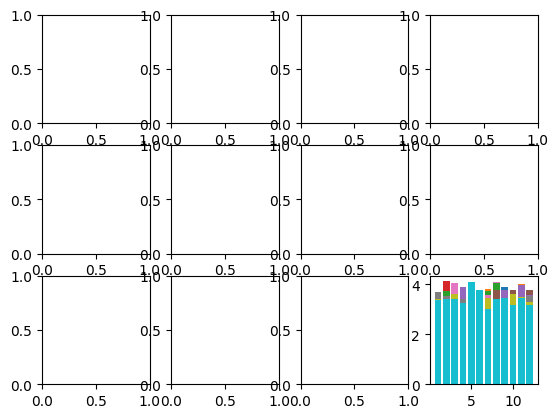

In [ ]:
df_list=[]
for Benefit in usage['BenefitID'].sort_values().unique():
    df_list.append({'BenefitID': Benefit, 'data': average_utilization('LastUsedMonth', usage[usage['BenefitID']==Benefit])})

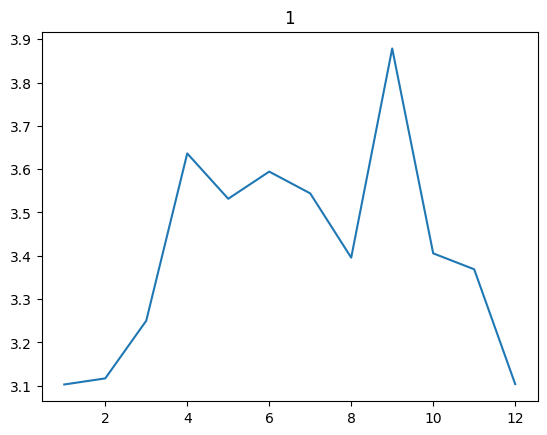

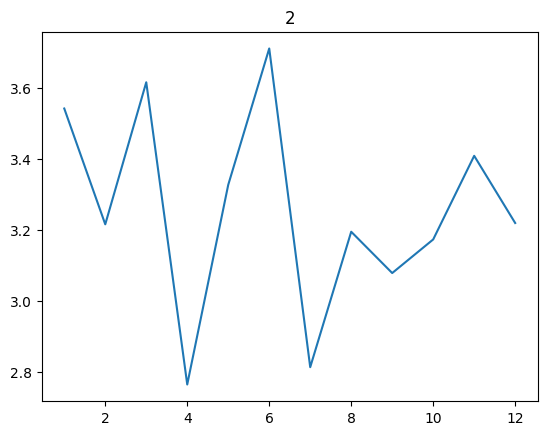

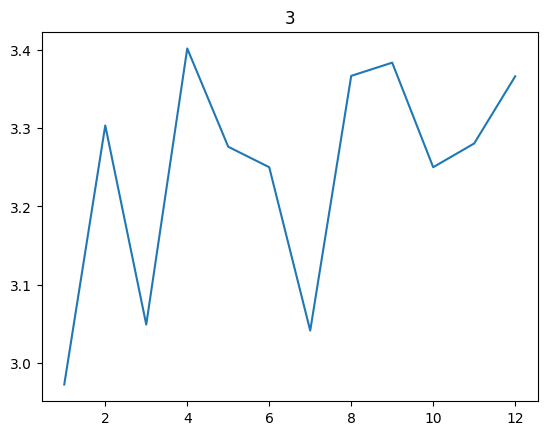

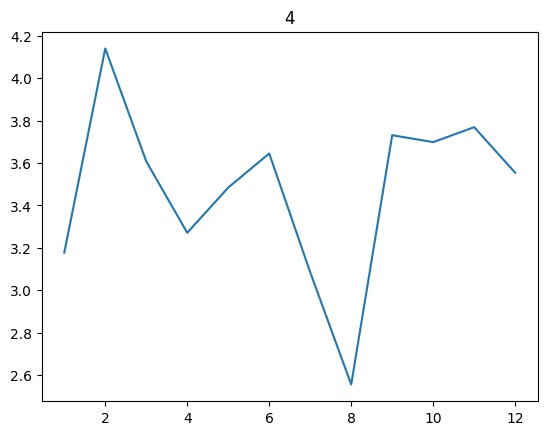

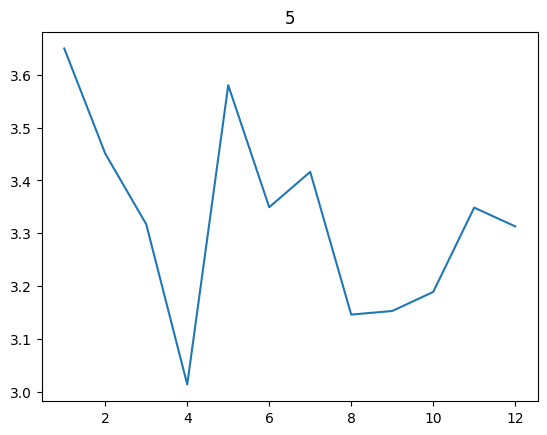

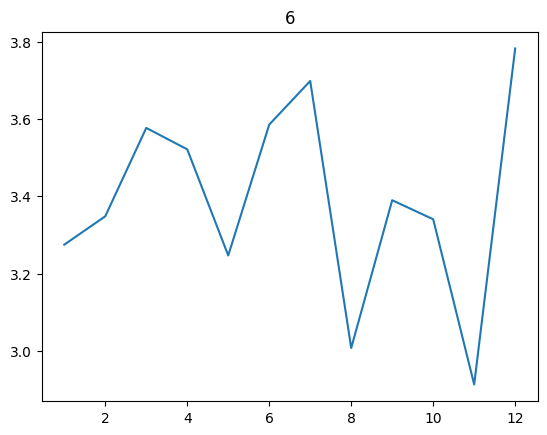

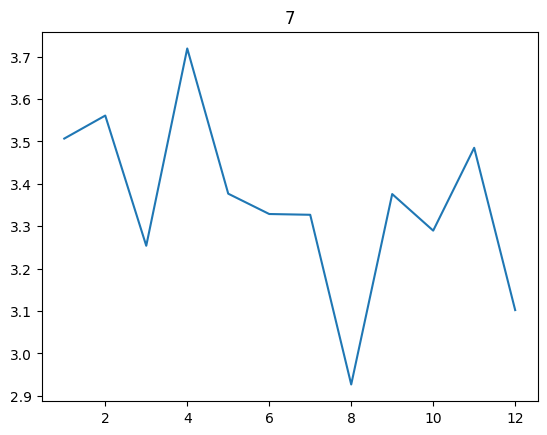

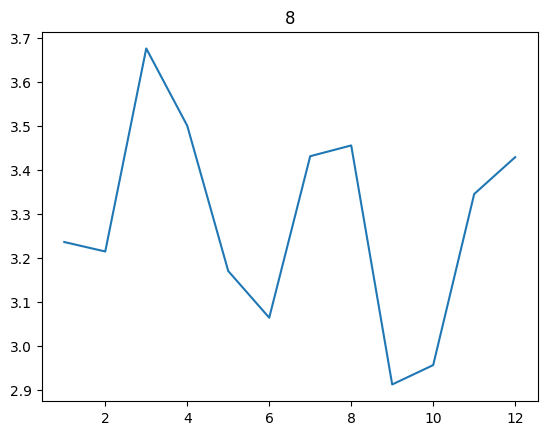

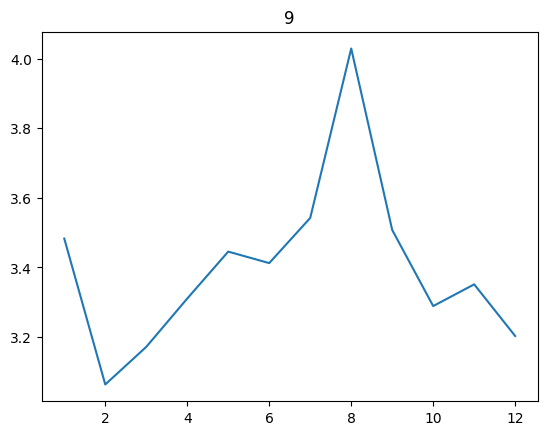

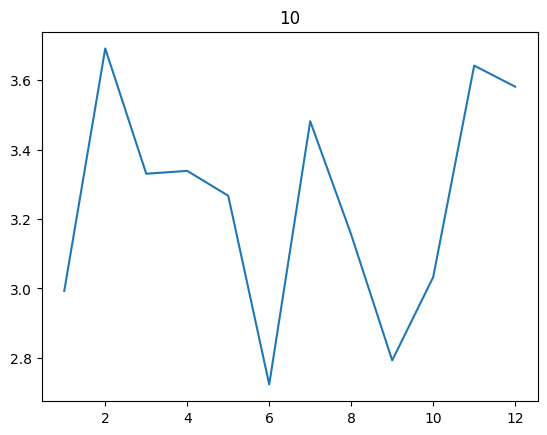

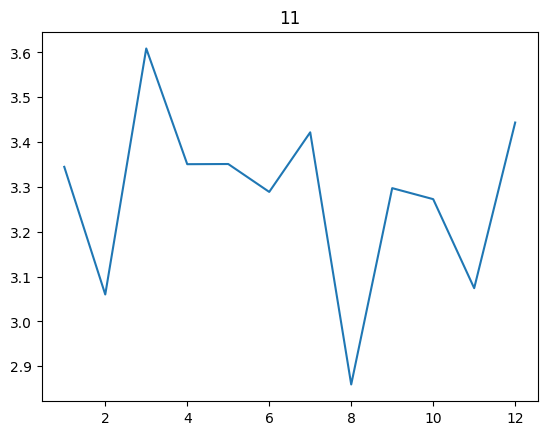

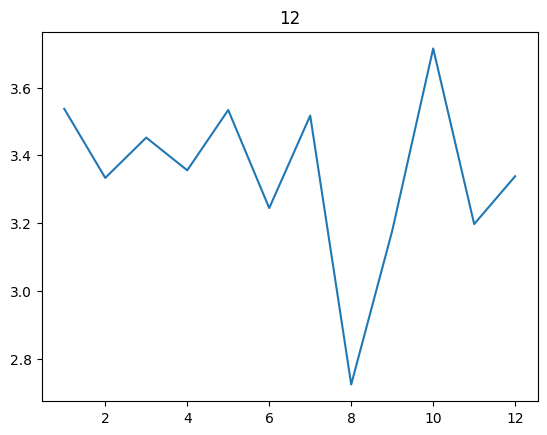

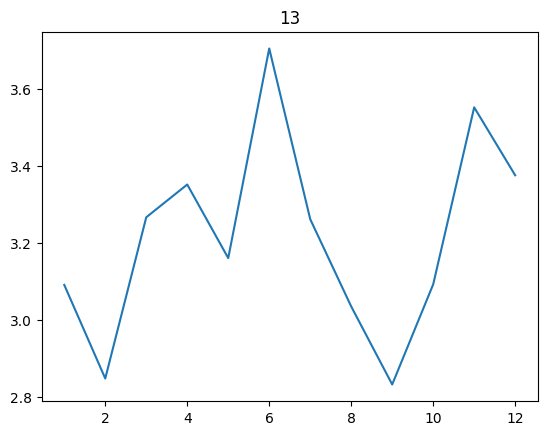

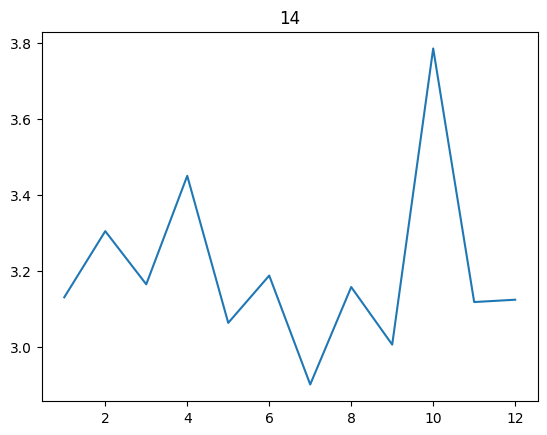

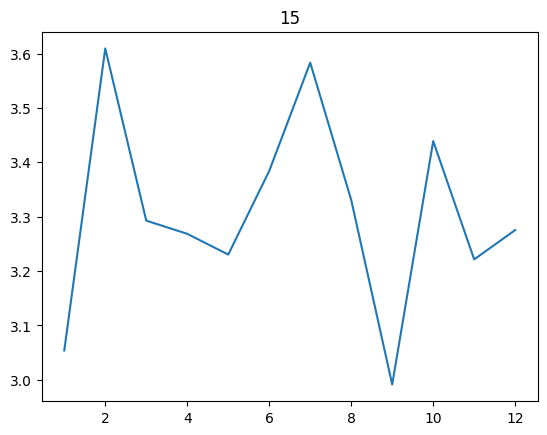

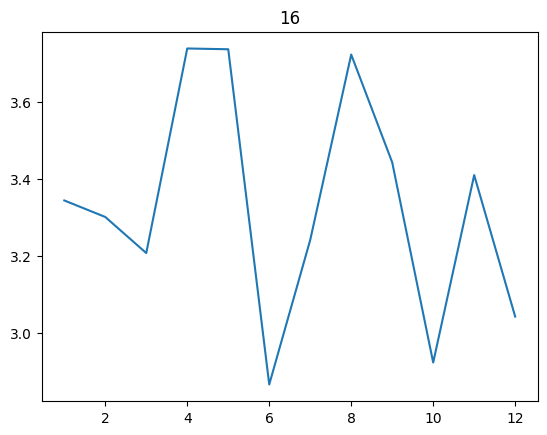

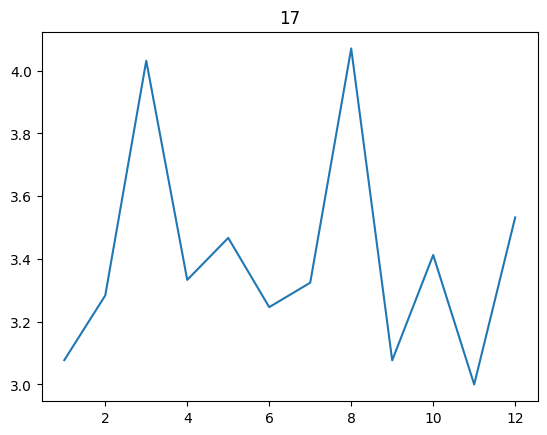

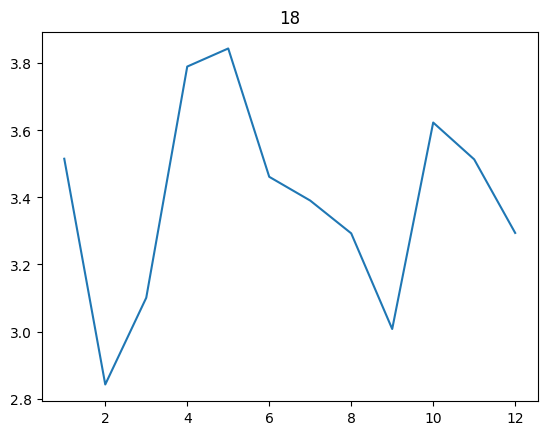

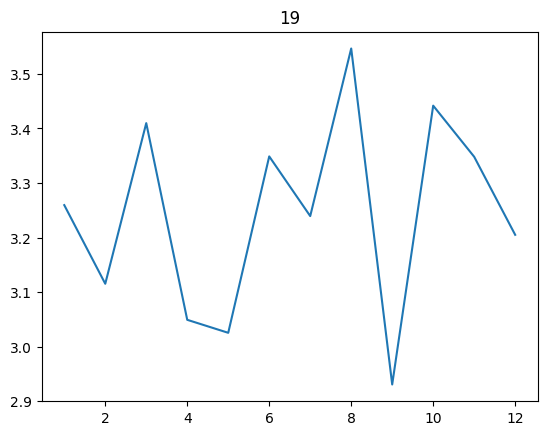

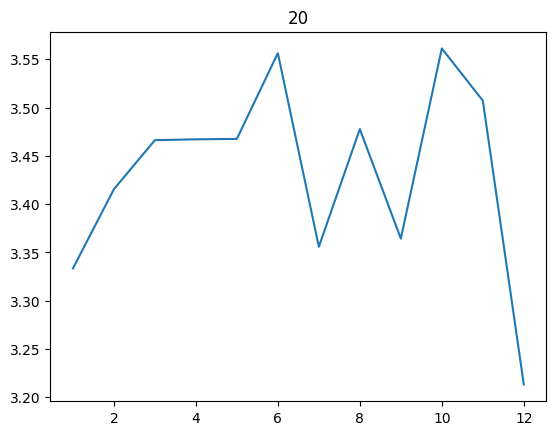

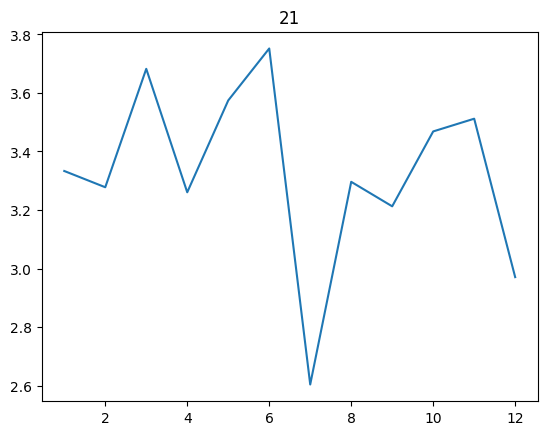

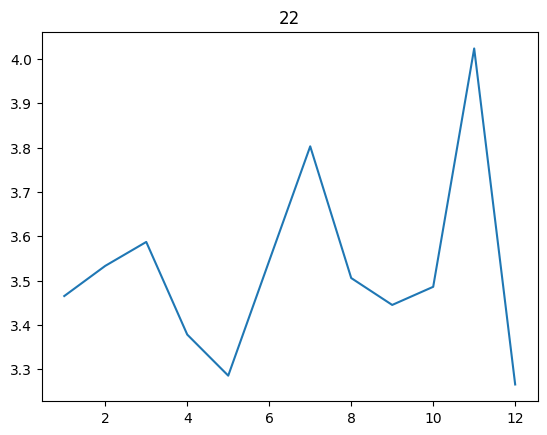

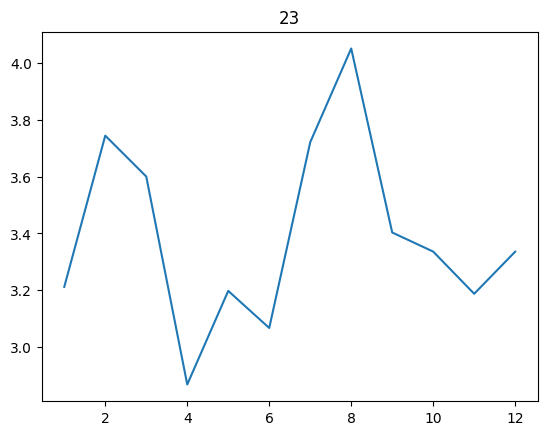

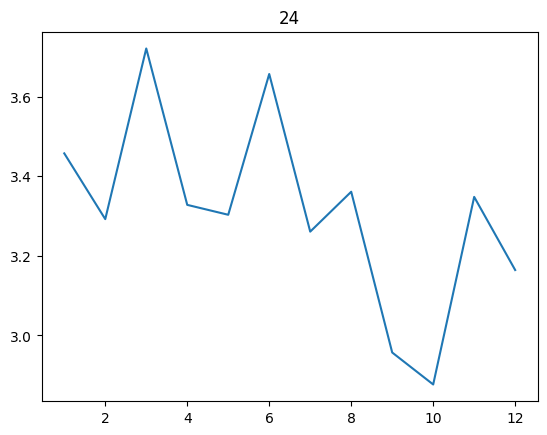

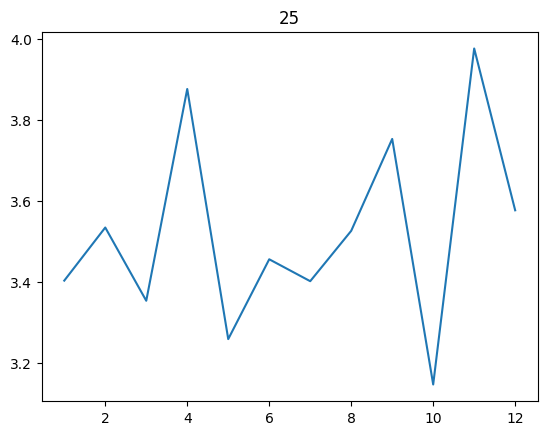

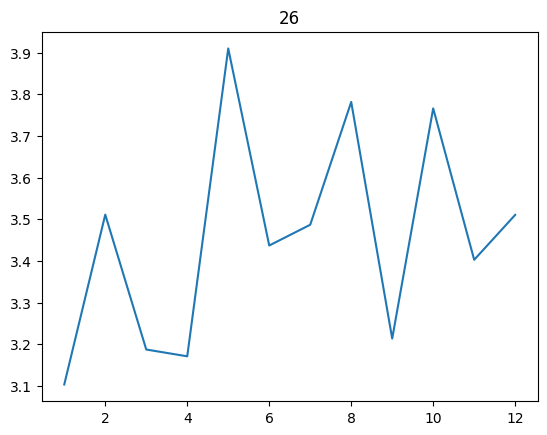

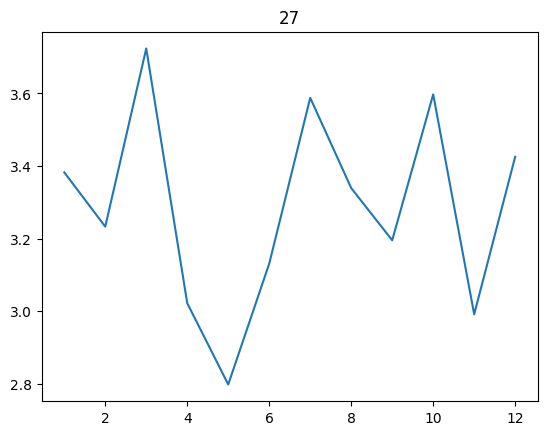

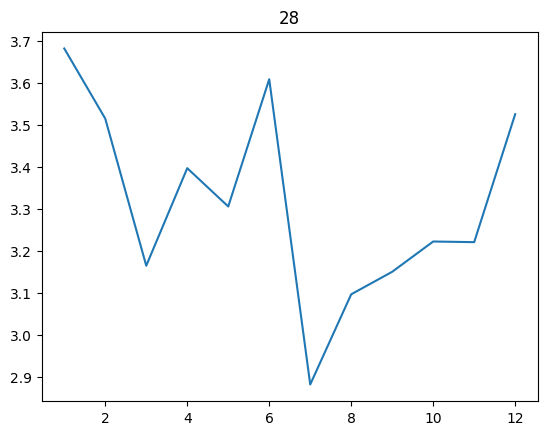

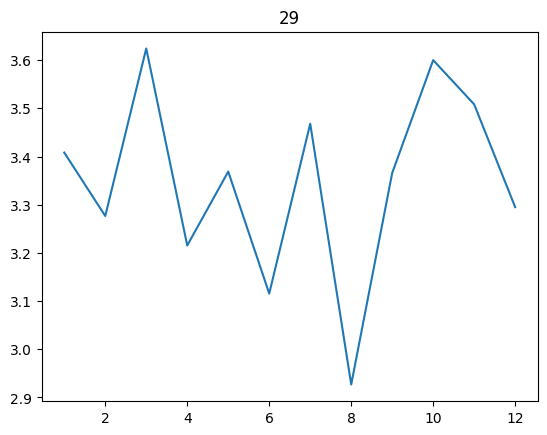

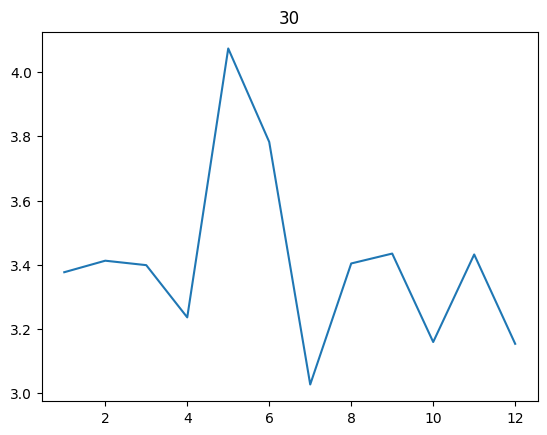

In [46]:
for BenefitID in df_list:
    plt.plot(BenefitID['data'])
    plt.title(BenefitID['BenefitID'])
    plt.show()

In [49]:
cleaned_data = pd.read_csv('encoded_phase1_cleaned_data.csv')

In [53]:
conditions = [
    (cleaned_data['UsageFrequency'] >= 7),
    (cleaned_data['UsageFrequency'] >= 3) & (cleaned_data['UsageFrequency'] < 7),
    (cleaned_data['UsageFrequency'] >= 0) & (cleaned_data['UsageFrequency'] < 3)
]
choices = [
    'High',
    'Medium',
    'Low'
]
cleaned_data['UsageCategory'] = np.select(conditions, choices, default='Fail')

In [55]:
cleaned_data.to_csv('phase1_with_Usage_Categories.csv', index=False)


In [59]:
cleaned_data_encoded_usage = pd.concat([cleaned_data, pd.get_dummies(cleaned_data['UsageCategory'], prefix='Usage_')], axis=1)


In [61]:
cleaned_data_encoded_usage.to_csv('phase1_usage_encoded.csv', index=False)